# Machine Learning Demonstration - Support Vector Machines

### Import the needed python modules and the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_table("cervical.txt")
data.shape

(714, 59)

In [3]:
data.head()

,ID,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29
0,let-7a,865,810,5505,6692,1456,588,9,4513,1962,...,37,3174,116,1722,68,12121,14398,39196,198,1422
1,let-7a*,3,12,30,73,6,2,0,199,10,...,0,648,4,212,6,2,80,164,18,1
2,let-7b,975,2790,4912,24286,1759,508,33,6162,1455,...,99,102358,184,28274,401,14471,24097,73139,669,2492
3,let-7b*,15,18,27,119,11,3,0,116,17,...,0,334,1,189,5,34,115,230,4,15
4,let-7c,828,1251,2973,6413,713,339,23,2002,476,...,34,1711,22,3127,199,3186,1454,5883,167,321


### Let's look at the library sizes (total read counts per sample)

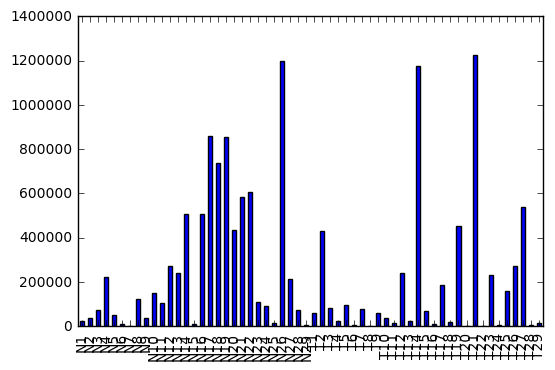

In [4]:
sizes = data.sum(numeric_only=True)
sizes.plot.bar()

### Normalization

Our library sizes are very different.  Lets normalize the data for library size so we are comparing apples to apples.

Here I use the normalization method of counts per milion (CPM).  We divide each count by the library size to give the proportion of total reads for each gene, then multiply by 1 million to get counts per 1 million.

In [5]:
ID = data.ID
data = data.drop('ID', 1)
sums = data.sum()
cpm = (data.div(sums))*1000000
cpm.insert(loc=0, column='ID', value=ID)
cpm.shape

(714, 59)

In [6]:
cpm.head()

,ID,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29
0,let-7a,38531.783153,20352.781547,76760.042947,30209.461900,27533.518655,64283.371597,6807.866868,36119.603669,52587.847436,...,11923.944570,2586.676903,33001.422475,7373.595506,8835.758836,76912.338589,52987.005340,72541.794445,29320.302088,87036.356959
1,let-7a*,133.636242,301.522690,418.310861,329.541351,113.462302,218.650924,0.000000,1592.688041,268.031842,...,0.000000,528.092827,1137.980085,907.782954,779.625780,12.690758,294.413143,303.522152,2665.482008,61.207002
2,let-7b,43431.778698,70104.025328,68491.431599,109633.441676,33263.364914,55537.334645,24962.178517,49317.305076,38998.633038,...,31904.608443,83417.477754,52347.083926,121069.128528,52104.989605,91823.979187,88680.918716,135361.626286,99067.081297,152527.849186
3,let-7b*,668.181211,452.284034,376.479775,537.197544,208.014221,327.976386,0.000000,928.401069,455.654132,...,0.000000,272.195994,284.495021,809.297068,649.688150,215.742885,423.218892,425.671311,592.329335,918.105031
4,let-7c,36883.602833,31433.740389,41454.606300,28949.981943,13483.103572,37061.331584,17397.881997,16022.921902,12758.315688,...,10957.138253,1394.393251,6258.890469,13389.798575,25857.588358,20216.377423,5350.958867,10887.931848,24729.749741,19647.447668


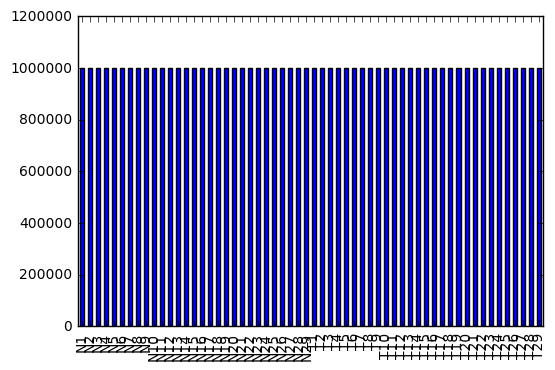

In [7]:
sizes = cpm.sum(numeric_only=True)
sizes.plot.bar()

### Here I re-format the data into a form suitable for input into the machine learning algorithm

In [8]:
cpm = cpm.transpose()
cpm = np.array(cpm[1:])
class_labels = np.array(["normal"]*29 + ["tumor"]*29)

### Train/Test Split - split the data into a training set and a testing set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cpm, class_labels, test_size=0.20, random_state=2)

In [10]:
print(X_train.shape)
print(X_test.shape)

(46, 714)
(12, 714)


### Now we'll use support vector machines with a linear kernel to create a classifier

In [11]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1.0).fit(X_train, y_train)

### Predict classifications of the test set data with our model and see how well the model performs

Here are the predictions:

In [12]:
predictions = svc.predict(X_test)
print(predictions)

['tumor' 'tumor' 'tumor' 'tumor' 'normal' 'tumor' 'normal' 'normal' 'tumor'
 'normal' 'tumor' 'tumor']


Here is the ground truth (we know what the samples are ahead of time):

In [13]:
print(y_test)

['tumor' 'tumor' 'tumor' 'tumor' 'normal' 'tumor' 'normal' 'normal' 'tumor'
 'normal' 'tumor' 'tumor']


Here is our prediction accuracy:

In [14]:
print("Prediction accuracy = ", round((svc.score(X_test, y_test)*100), 1), "%")

Prediction accuracy =  100.0 %
